In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import json

import torch
from dataset.loader import DatasetLoader
from tokenizer import ByteLevelBPE

import sys
sys.path.append("..")
import config

import matplotlib.pyplot as plt

import importlib

/home/nad/studies/Transformer-Image-Captioning-IIW/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = config.BATCH_SIZE_TRAIN

# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

random.seed(42)

importlib.reload(config)

<module 'config' from '/home/nad/studies/Transformer-Image-Captioning-IIW/config.py'>

In [3]:
data_loader = DatasetLoader(dataset_type=config.DATASET, batch_size_train=1, batch_size_test=1, shuffle_test=True)
data_loader.load_data()

train_dataloader = data_loader.get_train_dataloader()
test_dataloader = data_loader.get_test_dataloader()

Loading DOCCI dataset...
DatasetDict({
    train: Dataset({
        features: ['image', 'description'],
        num_rows: 9647
    })
    test: Dataset({
        features: ['image', 'description'],
        num_rows: 5000
    })
    qual_dev: Dataset({
        features: ['image', 'description'],
        num_rows: 100
    })
    qual_test: Dataset({
        features: ['image', 'description'],
        num_rows: 100
    })
})


In [4]:
print(len(train_dataloader), len(test_dataloader))

9647 5000


/tmp/ipykernel_374670/3186784317.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.5179958].


{'pixel_values': tensor([[[[-0.2342,  0.0569,  0.7762,  ...,  0.1426,  0.1426,  0.1426],
          [-0.4397, -0.2856,  0.2111,  ...,  0.1597,  0.1597,  0.1597],
          [-0.0629, -0.2171,  0.2967,  ...,  0.1768,  0.1597,  0.1597],
          ...,
          [-1.0219, -1.0048, -0.7822,  ..., -1.2445, -0.9363, -1.1589],
          [-0.4911, -0.1314,  0.1083,  ..., -1.6555, -1.5014, -1.0733],
          [ 0.0741,  0.0912,  0.2111,  ..., -1.6727, -1.6555, -1.6213]],

         [[-0.0574,  0.1352,  0.7829,  ...,  0.9930,  0.9930,  0.9930],
          [-0.2675, -0.1975,  0.2402,  ...,  1.0105,  1.0105,  1.0105],
          [ 0.0651, -0.1450,  0.3627,  ...,  1.0280,  1.0105,  1.0105],
          ...,
          [-0.8102, -0.7227, -0.4601,  ..., -0.8627, -0.5301, -0.7402],
          [-0.1099,  0.2577,  0.5378,  ..., -1.2829, -1.1253, -0.6877],
          [ 0.4678,  0.4853,  0.6254,  ..., -1.3004, -1.2829, -1.2654]],

         [[ 0.2522,  0.3568,  0.8448,  ...,  2.1868,  2.1868,  2.1868],
          [ 0

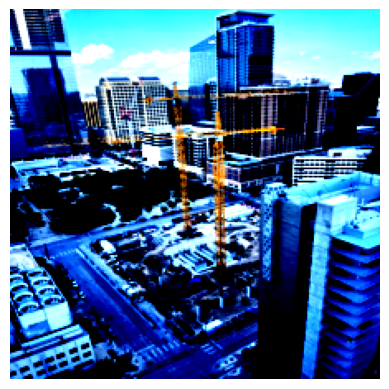

/tmp/ipykernel_374670/3186784317.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Description:
 ['An outdoor angled down view of a city environment that consists of many tall buildings that are different shapes, sizes, and colors. In the center of all of the buildings is an entire block that is undergoing construction, the construction sites hilly ground floor is made up of dirt. Placed on the dirt ground floor are several white trailer homes, construction vehicles, cement pillars, cement foundations, and two extremely tall tower cranes that are colored yellow and are the height of the buildings surrounding the site. Behind the construction site, towards the left, is a park that consists of green grass and bushy trees that have dark green leaves.']


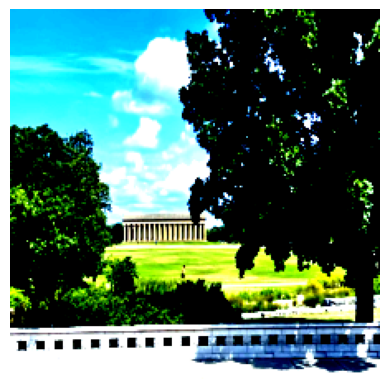

Description:
 ['A long shot view across a large lawn at the Nashville, Tennessee Parthenon. The view is from a terrace that has a short horizontal concrete brick wall. The wall alternates bricks across its center to leave an opening that is each a brick wide. The Parthenon is tan and in the center and is the focus of the image. Tall tan columns run across the front of the Parthenon. The bottom left corner has a rounded bush with small green leaves that goes halfway up the left edge of the frame. The right half of the frame is filled with a large leafy tree. The tree trunk is dark due to the angle of daylight. Sunlight reflects off some leafy branches of the large tree. A shadow of the tree is cast underneath it slightly toward the viewer onto the terrace. A tiny figure is facing right on a track that is behind the terrace wall and bushes. Behind the terrace wall are more stone walls that are visible on the right, with landscaping between them. In the center and upper left corner of the

In [5]:
train_sample = next(iter(train_dataloader))
print(train_sample)
plt.imshow(np.array(train_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', train_sample['description'])

test_sample = next(iter(test_dataloader))
plt.imshow(np.array(test_sample['pixel_values'].squeeze().permute(1, 2, 0)))
plt.axis('off')
plt.show()
print('Description:\n', test_sample['description'])

In [6]:
lengths = []
descriptions = []

for sample in train_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

for sample in test_dataloader:
    desc = sample['description'][0]
    lengths.append(len(desc))
    descriptions.append(desc)

In [7]:
# Decide on vocab size based on count of unique words in the dataset
print(set(" ".join(descriptions).split()))
count_unique_words = len(set(" ".join(descriptions).split()))
print(f"Count of unique words in the dataset: {count_unique_words}")

file_path = os.path.join(config.TOKENIZER_DATA_PATH, 'count_unique_words_{}_{}.json'.format(config.TOKENIZER_FILENAME_PREFIX, config.DATASET))
with open(file_path, 'w') as f:
    json.dump({'count_unique_words': count_unique_words}, f)

{'can."NO', 'seabed', 'Rays', 'tiger,', '"Echinocereus', 'RUNNERS', 'lightsaber', 'luminous', 'four-sided', 'Roads', 'off,"Hot', 'border,', 'persons', 'normally', 'miniatures.', 'wardrobe.', 'IMPAIRED"', 'worm-like', 'holstered', 'tricycle.', 'bridge', 'identified.', 'O.', 'poppy', 'over.', 'however,', 'jade', 'historic', 'levels.', 'ripeness.', '"i"', '"OFFICE."', 'dimpling', 'right-side.', 'reads,"THE', '45', '"U","V","W","Y","Z"', 'slim', 'visible;', 'bowl,', '"MAIN', "ROAD'", '"MISSION".', 'RED".', 'sketchy.', 'written,"OBJECTS', 'HAUL"', 'gray;', 'handlebars,', 'moisture,', '"OVO".', 'particle', 'seven.', '"THOR","THRILL', 'blowhole.', 'continent', 'less.', 'vertically),', '"990418"', 'metal', 'Chlorophytum', 'piping.', 'representing', 'dirt', 'TENNYSON"', 'proportionate', 'pamphlet.', 'Mo".', 'shelf,', 'banjo.', '"25",', 'snugged', 'trick,', 'lei', 'Stormtroopers', 'WORK"/"AHEAD".', 'slides,', 'Sir', 'chessboard,', 'sold', 'Small,', 'quarter.', 'Jaguar', 'engravings.', 'dark-tint

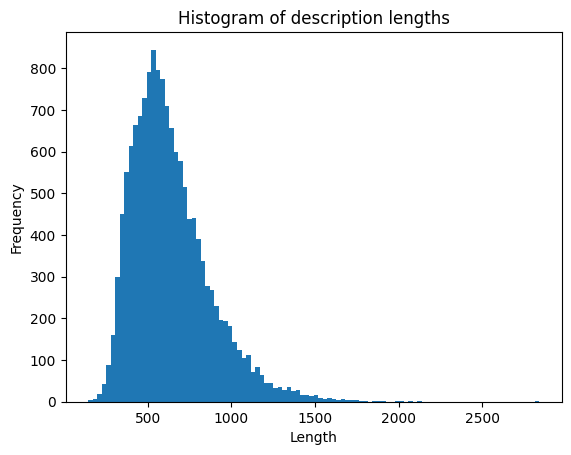

Length mean:  640.0041646753601
Length median:  596.0
Length std:  236.81620852651727
Length max (90th percentile):  956
Length max (92nd percentile):  997
Length max (95th percentile):  1089
Length max (99th percentile):  1394


In [8]:
plt.hist(lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(lengths)
median = np.median(lengths)
std = np.std(lengths)
max_length_90 = int(np.percentile(lengths, 90))
max_length_92 = int(np.percentile(lengths, 92))
max_length_95 = int(np.percentile(lengths, 95))
max_length_99 = int(np.percentile(lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [9]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [11]:
special_tokens = [config.SpecialTokens.PAD, config.SpecialTokens.BOS, config.SpecialTokens.EOS]
bpe_tokenizer = ByteLevelBPE(special_tokens=special_tokens)

train_vocab_size = count_unique_words + len(special_tokens) + 1000  # Adding buffer to estimated unique word count

bpe_tokenizer.train(descriptions, vocab_size=train_vocab_size, verbose=True)
print(bpe_tokenizer)
bpe_tokenizer.save(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

special_tokens_dict: {<SpecialTokens.PAD: '<pad>'>: 0, <SpecialTokens.BOS: '<bos>'>: 1, <SpecialTokens.EOS: '<eos>'>: 2}


Vocab size (with special tokens): 14165
Made 13906 merges
ByteLevelBPE(vocab_size=14165)


In [12]:
max_desc_length_tokens = data_loader.get_max_description_length_in_tokens(tokenizer=bpe_tokenizer, descriptions=descriptions, max_sequence_length=-1)

In [13]:
# export json for setting MAX_DESC_LENGTH=max_desc_length in config later
with open(os.path.join(config.TOKENIZER_DATA_PATH, "max_desc_length_{}.json".format(config.DATASET)), "w") as f:
    json.dump({"MAX_DESC_LENGTH": max_desc_length_tokens}, f)

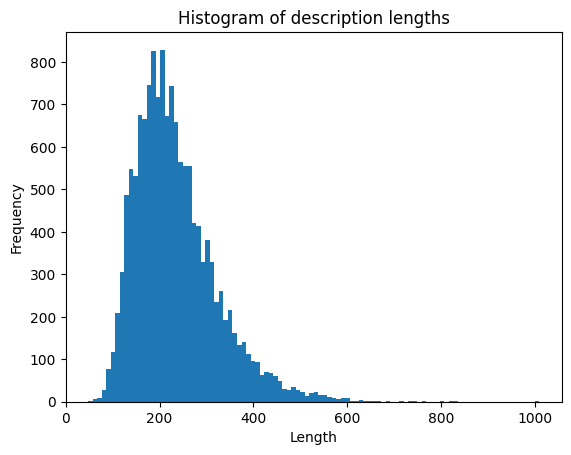

Length mean:  234.69884618010514
Length median:  219.0
Length std:  87.49006541169796
Length max (90th percentile):  349
Length max (92nd percentile):  366
Length max (95th percentile):  400
Length max (99th percentile):  517


In [14]:
token_lengths = []
for desc in descriptions:
    encoded = bpe_tokenizer.encode(desc, max_seq_length=-1, verbose=False)['input_ids']
    token_lengths.append(len(encoded))

plt.hist(token_lengths, bins=100)
plt.title("Histogram of description lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

mean = np.mean(token_lengths)
median = np.median(token_lengths)
std = np.std(token_lengths)
max_length_90 = int(np.percentile(token_lengths, 90))
max_length_92 = int(np.percentile(token_lengths, 92))
max_length_95 = int(np.percentile(token_lengths, 95))
max_length_99 = int(np.percentile(token_lengths, 99))
print('Length mean: ', mean)
print('Length median: ', median)
print('Length std: ', std)
print('Length max (90th percentile): ', max_length_90)
print('Length max (92nd percentile): ', max_length_92)
print('Length max (95th percentile): ', max_length_95)
print('Length max (99th percentile): ', max_length_99)

In [15]:
with open(os.path.join(config.TOKENIZER_DATA_PATH, "description_token_stats_{}.json".format(config.DATASET)), "w") as f:
    json.dump({
        "mean": round(mean),
        "median": round(median),
        "std": round(std),
        "max_90": max_length_90,
        "max_92": max_length_92,
        "max_95": max_length_95,
        "max_99": max_length_99
    }, f)

In [16]:
bpe_tokenizer.load(folder=config.TOKENIZER_DATA_PATH, filename_prefix=config.TOKENIZER_FILENAME_PREFIX)

samples = 10

for batch in train_dataloader:
    if samples < 0:
        break
    desc_batch = batch['description']
    for desc in desc_batch:
        print('Description: ', desc)
        print('Tokenized: ', bpe_tokenizer.tokenize(desc))
        encoded = bpe_tokenizer.encode(desc, max_seq_length=len(bpe_tokenizer.tokenize(desc))+2, verbose=True)['input_ids']
        print(f'Encoded: {encoded}')
        decoded = bpe_tokenizer.decode(encoded)
        print(f'Decoded: {decoded}\n')
        decoded_stripped = bpe_tokenizer.strip(decoded)
        # cut desc to be the same length as decoded_stripped
        desc_cut = desc[:len(decoded_stripped)]
        assert desc_cut == decoded_stripped, "Decoded text does not match original!"
    samples -= 1

Description:  An outdoor long shot down a red brick walkway headed towards a two-story white brick building with grey roof shingles. The red bricks of the walkway are laid in a herringbone pattern, with two brick benches along its left side and two more on its right side. The sunlight falls on the brick walkway through the gaps of the large overhanging bushy branches. Tall green grass growth is visible along the left and right outside the walkway. The base of the brick building has a black stain that goes up about 2 feet. A white picket fence is visible running left to right along the property line of a white house in the back right. A red fire hydrant is visible along the asphalt road in front of the white picket fence. A clear blue sky is partially visible above the distant tree line. Daytime.
Tokenized:  ['An', 'Ġoutdoor', 'Ġ', 'lo', 'n', 'g', 'Ġshot', 'Ġdown', 'Ġa', 'Ġ', 're', 'd', 'Ġbri', 'ck', 'Ġwalkway', 'Ġ', 'head', 'ed', 'Ġto', 'ward', 's', 'Ġa', 'Ġtwo', '-', 'st', 'or', 'y', 